Evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

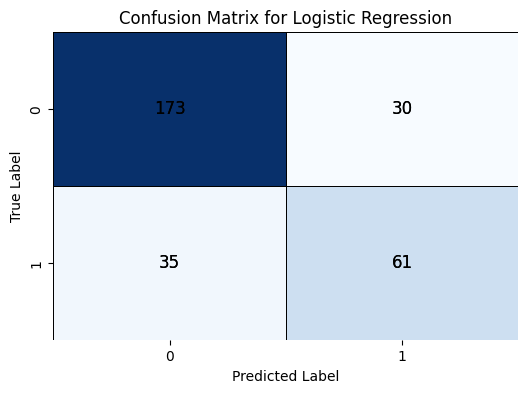

------------------------------------------------------------
Evaluating Decision Tree...


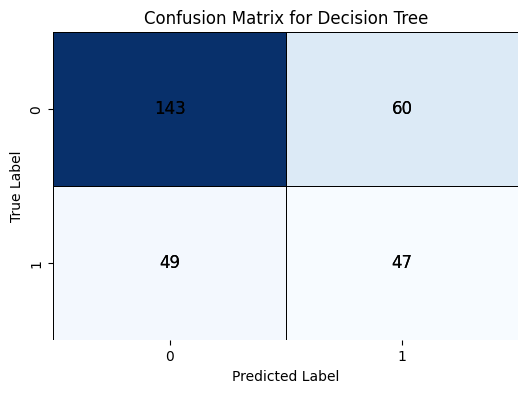

------------------------------------------------------------
Evaluating Random Forest...


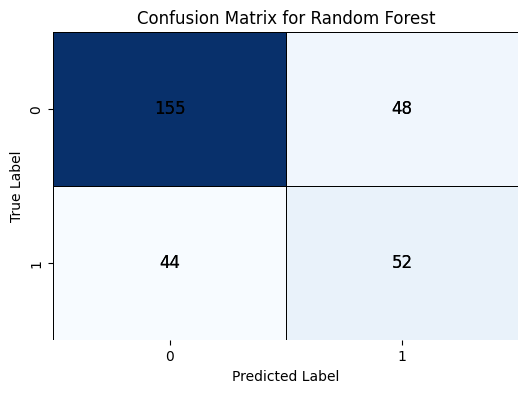

------------------------------------------------------------
Evaluating Naive Bayes...


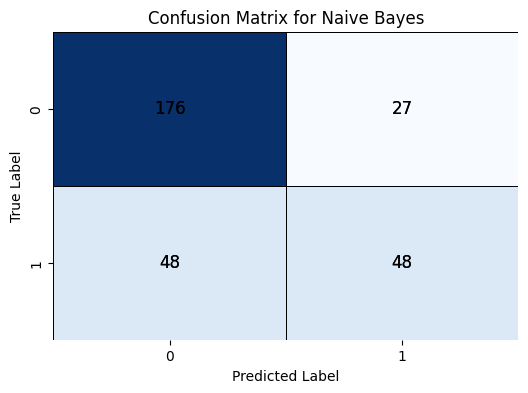

------------------------------------------------------------
Evaluating ANN...


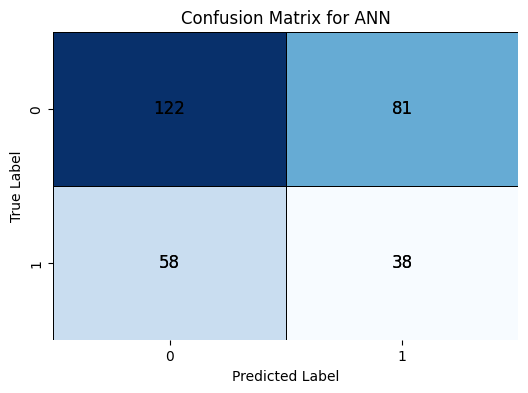

------------------------------------------------------------
Evaluating K-Nearest Neighbors...


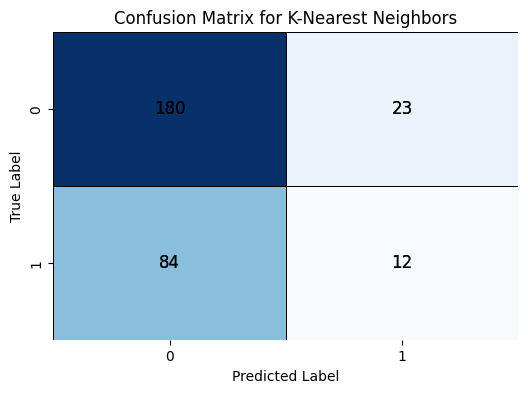

------------------------------------------------------------

Classification Report:
                     Accuracy  Precision  Recall  F1-score
Logistic Regression      0.78       0.67    0.64      0.65
Decision Tree            0.64       0.44    0.49      0.46
Random Forest            0.69       0.52    0.54      0.53
Naive Bayes              0.75       0.64    0.50      0.56
ANN                      0.54       0.32    0.40      0.35
K-Nearest Neighbors      0.64       0.34    0.12      0.18


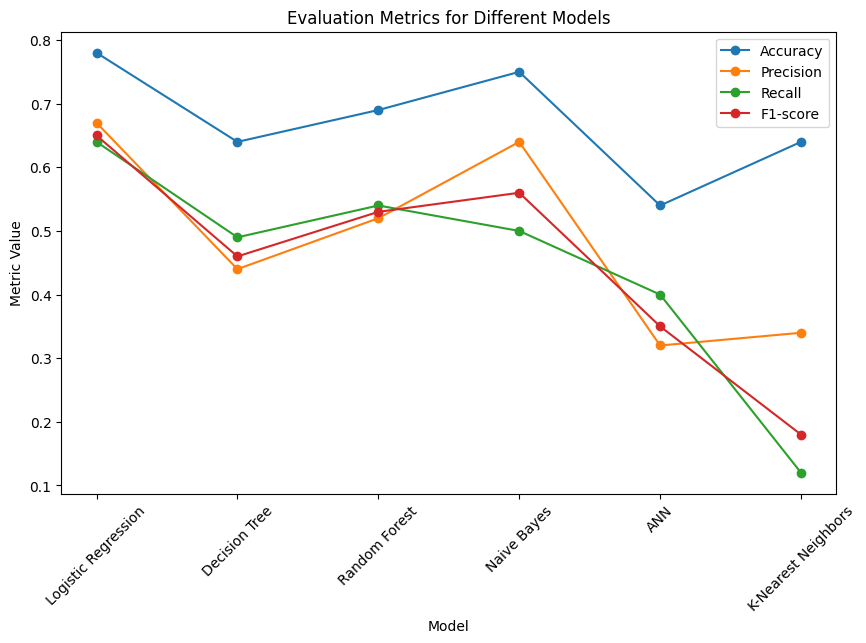

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

np.random.seed(42)
# Load the dataset
data = pd.read_csv('/content/sample_data/heart_failure_clinical_records_dataset.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Define the feature selection method
selector = SelectKBest(score_func=f_classif)

# Define the models with hyperparameters for tuning
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300]}),
    'ANN': (MLPClassifier(), {'hidden_layer_sizes': [(50,), (100,), (50, 50)]}),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
}

# Perform nested cross-validation and calculate evaluation metrics for each model
model_metrics = {}
for model_name, (model, params) in models.items():
    print(f"Evaluating {model_name}...")

    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_

    # Perform feature selection within each fold
    y_pred = cross_val_predict(best_model, X, y, cv=5)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    model_metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

    # Generate the confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Visualize the confusion matrix with values and sky blue color
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"fontsize": 12, "color": "black"}, linewidths=0.5, linecolor="black")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Add values to each box
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j + 0.5, i + 0.5, str(cm[i, j]), ha='center', va='center', color='black', fontsize=12)

    plt.show()

    print('-' * 60)

# Create a classification report DataFrame
metrics_df = pd.DataFrame(model_metrics).T
metrics_df = metrics_df.round(2)
print("\nClassification Report:")
print(metrics_df)

# Visualize the evaluation metrics
metric_names = list(model_metrics['Logistic Regression'].keys())
metric_values = {metric_name: metrics_df[metric_name].values for metric_name in metric_names}

plt.figure(figsize=(10, 6))
for metric_name, values in metric_values.items():
    plt.plot(list(models.keys()), values, marker='o', label=metric_name)

plt.title('Evaluation Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()
